<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Loading the data
file_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

data= pd.read_csv(file_path)

# Make a copy of the dataset
df = data.copy()

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [48]:
# Shape of the dataset

numberofrows_1, numberofcolumns_1 = df.shape
print('There are {} rows and {} columns'.format(numberofrows_1, numberofcolumns_1)+' in our Netflix Dataset.')

There are 7787 rows and 12 columns in our Netflix Dataset.


In [49]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


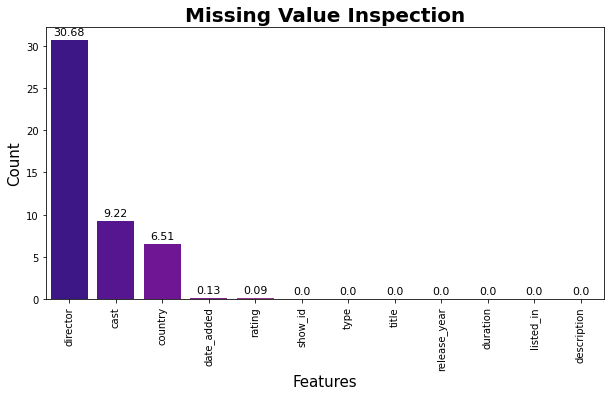

In [50]:
# Missing value Inspection

Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'plasma')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

- 'director'(30.68%), 'cast'(9.22%), 'country'(6.51%), 'date_added'(0.13%), 'rating'(0.09%) are features with missing values. 

- Other than 'rating' none of the features can be imputed with statistical method.

- Therefore, the columns 'director', 'cast' are dropped from the dataset.

- Then all the rows containing missing values are dropped.

In [51]:
df['rating'].replace(np.nan, 'TV-MA', inplace  = True)
df['country'].replace(np.nan, 'United States', inplace  = True)
df['cast'].replace(np.nan, 'missing info', inplace  = True)

In [52]:
# Dropping off 'director' and 'cast' variables
#df.drop(['director', 'cast'], axis = 1, inplace = True)

# Drop all null values containing rows
#df.dropna(axis = 0, inplace = True)

In [53]:
# Checking for the null values

#df.isnull().sum().sum()

In [54]:
# Shape of the modified dataset

#print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1])+' in our modified Netflix Dataset.')

In [55]:
# Generate count statistics of duplicate entries

if (len(df[df.duplicated()]) > 0):
    print('No. of duplicated entries: ', len(df[df.duplicated()]))
    print(df[df.duplicated(keep = False)].sort_values(by = list(df.columns)).head())
else:
    print('No duplicated entries found.')

No duplicated entries found.


In [56]:
# Unique values of all features

df.nunique().to_frame(name = 'Unique Values')

,Unique Values
show_id,7787
type,2
title,7787
director,4049
cast,6832
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [57]:
# Drop 'show_id' variable

df.drop('show_id', axis = 1, inplace = True)

In [58]:
# type analysis

type_name = df['type'].value_counts()
colors = ['#BBFFFF', '#FFD700']

trace = go.Pie(labels = type_name.index, 
               values = type_name, 
               textinfo = 'value',
               marker = dict(colors = colors, 
               line=dict(color = '#000000', 
               width = 2)))

layout = go.Layout(title = 'Proportion of Show types', width = 500, height = 500)
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig, filename='pie_chart_subplots')

- 71% of the Netflix shows are Movie and 29% are TV Show.

In [59]:
# Rating insights

df['rating'].value_counts().to_frame()

,rating
TV-MA,2870
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194
NR,84


In [60]:
# Show type vs Rating

type_TvShow = df[df['type'] == 'TV Show']['rating']
trace0 = go.Box(y = type_TvShow, name = 'Rating of TV Shows',
              marker = dict(color = 'rgb(214, 12, 140)',))

type_Movie = df[df['type'] == 'Movie']['rating']
trace1 = go.Box(y = type_Movie, name = 'Rating of Movies',
              marker = dict(color = 'rgb(0, 128, 128)',))

layout = go.Layout(title = 'Box Plots of Netflix Shows',width = 800, height = 500)

data = [trace0, trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

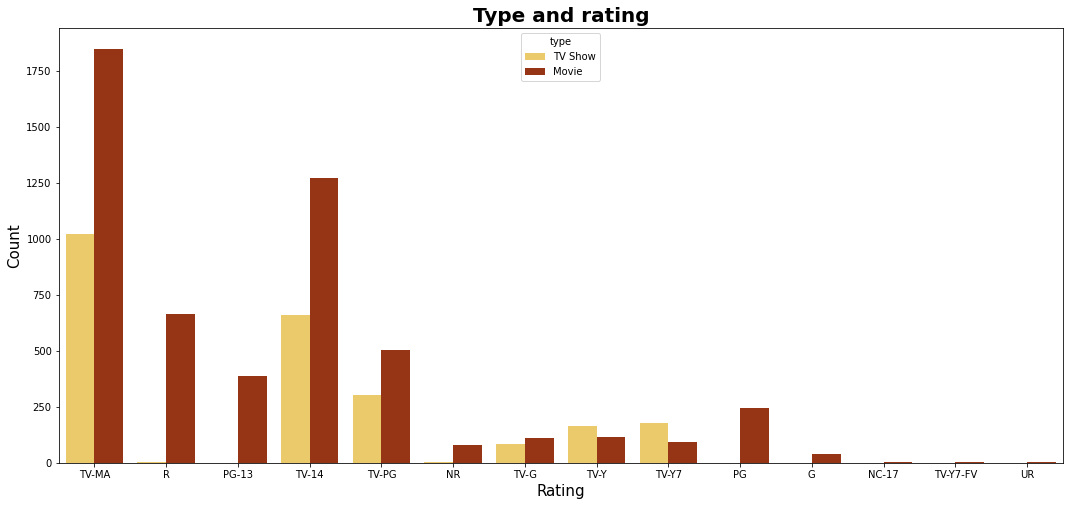

In [61]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'rating', hue = 'type', data = df, palette = 'afmhot_r')
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Type and rating', size = '20', fontweight = 'bold')
plt.show();

In [62]:
# Release year insights

df['release_year'].value_counts().to_frame().head(10)

,release_year
2018,1121
2017,1012
2019,996
2016,882
2020,868
2015,541
2014,334
2013,267
2012,219
2010,173


In [63]:
# Year wise Netflix Shows

fig = go.Figure()
year = df['release_year'].value_counts().to_frame().head(10).index
yearly_movies = df[df.type == 'TV Show']['release_year'].value_counts().sort_index(ascending = False).head(10)
trace0 = go.Scatter(x = year, y = yearly_movies, name = 'Yearly Movies',
              marker = dict(color = 'rgb(255,140,0)',))

yearly_shows = df[df.type == 'Movie']['release_year'].value_counts().sort_index(ascending = False).head(10)
trace1 = go.Scatter(x = year, y = yearly_shows, name = 'Yearly Shows',
              marker = dict(color = 'rgb(3,168,158)',))

total_content = df['release_year'].value_counts().sort_index(ascending = False).head(10)
trace2 = go.Scatter(x = year, y = total_content, name = 'Total Content',
              marker = dict(color = 'rgb(255,106,106)',))


layout = go.Layout(title = 'Line plot of Netflix Shows',width = 1000, height = 500)

data = [trace0, trace1, trace2]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [64]:
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending = False).rename(
    columns = {'index' : 'Cast Name', 0 : 'Count'}).iloc[1:]
df_cast_count.head()

,Cast Name,Count
1296,Anupam Kher,38
194,Takahiro Sakurai,28
4051,Shah Rukh Khan,27
2214,Om Puri,27
742,Boman Irani,25


In [65]:
df['director'].value_counts().to_frame(name = 'Count').head()

,Count
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12


In [66]:
country = df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names = 'index', color_discrete_sequence = px.colors.sequential.Reds)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

In [67]:
fig = px.bar(df, 
             x = df['listed_in'].value_counts().head(15).index, 
             y = df['listed_in'].value_counts().head(15).values,
             color_discrete_sequence = px.colors.sequential.Plasma,
             labels = {'x':'Genre ', 'y': 'Count '}, 
             title = 'Top 15 Genre in Shows',
             height = 500)
fig.show()

In [68]:
tv_df = df[df['type'] == 'TV Show']
tv_df['duration'].value_counts()


tv = tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv, values = 'duration', names = 'index', color_discrete_sequence = px.colors.sequential.RdBu)
fig.update_layout(title = 'Season-wise distribution of TV Shows')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', textfont_size = 20,
                  marker = dict( line = dict(color = '#000000', width = 2)))

Long TV Shows:

In [69]:
tv_df['duration'].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [70]:
tv_df['director'].value_counts().to_frame(name = 'Count').head()

,Count
Alastair Fothergill,3
Ken Burns,2
Shin Won-ho,2
Iginio Straffi,2
Rob Seidenglanz,2


In [71]:
tv_df['duration'] = tv_df['duration'].str.replace('Season','')
tv_df['duration'] = tv_df['duration'].str.replace('s','')
tv_df['duration'] = tv_df['duration'].astype(str).astype(int)

long_shows = tv_df[tv_df['duration'] > 8]
long_shows_df = long_shows[['title','duration']]
long_shows_df.rename(columns = {'title' : 'TV Show', 'duration': 'Seasons'}, inplace = True)
long_shows_df.sort_values(by = ['Seasons'], ascending = False)

,TV Show,Seasons
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
5137,Red vs. Blue,13
1471,COMEDIANS of the world,13
7169,Trailer Park Boys,12
1537,Criminal Minds,12
2263,Frasier,11
2678,Heartland,11
1300,Cheers,11


In [72]:
fig = px.bar(tv_df, 
             x = tv_df['listed_in'].value_counts().head(15).index, 
             y = tv_df['listed_in'].value_counts().head(15).values,
             color_discrete_sequence = px.colors.sequential.speed,
             labels = {'x':'Genre ', 'y': 'Count '}, 
             title = 'Top 15 Genre in TV Shows',
             height = 500)
fig.show()

In [73]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration'].value_counts()


movie_duration = movie_df['duration'].value_counts().head(10).sort_index(ascending = False).T.reset_index()

fig = px.pie(movie_duration, values = 'duration', names = 'index', color_discrete_sequence = px.colors.sequential.Turbo)
fig.update_layout(title = 'Top 10 Duration for Movies')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', textfont_size = 20,
                  marker = dict( line = dict(color = '#000000', width = 2)))

In [74]:
movie_df['director'].value_counts().to_frame(name = 'Count').head()

,Count
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12


In [75]:
fig = px.bar(movie_df, 
             x = movie_df['listed_in'].value_counts().head(15).index, 
             y = movie_df['listed_in'].value_counts().head(15).values,
             color_discrete_sequence = px.colors.sequential.ice,
             labels = {'x':'Genre ', 'y': 'Count '}, 
             title = 'Top 15 Genre in Movie Shows',
             height = 500)
fig.show()

In [76]:
tv_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes..."
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir..."
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...","[Robert Więckiewicz, Maciej Musiał, Michalin..."
12,TV Show,1994,Diego Enrique Osorno,missing info,Mexico,"May 17, 2019",2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,[missing info]
16,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,"March 20, 2019",2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...","[Shahd El Yaseen, Shaila Sabt, Hala, Hanadi..."


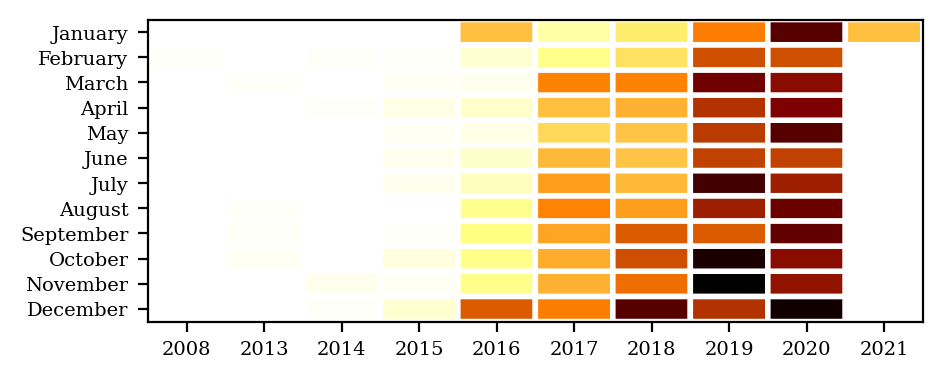

In [77]:
netflix_date = tv_df[['date_added']].dropna()

netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_year_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(5, 2), dpi=200)
plt.pcolor(month_year_df, cmap = 'afmhot_r', edgecolors = 'white', linewidths = 2) # heatmap
plt.xticks(np.arange(0.5, len(month_year_df.columns), 1), month_year_df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(month_year_df.index), 1), month_year_df.index, fontsize=7, fontfamily='serif');

In [78]:
# feature engineering
# getting date in the right format and year/month extraction
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

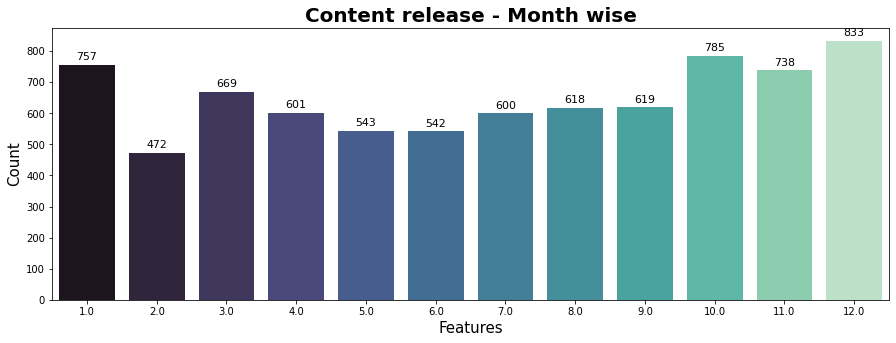

In [79]:
f, ax = plt.subplots(figsize = (15, 5))
cplot = sns.countplot(x = df['month_added'], palette = 'mako')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Content release - Month wise', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

In [80]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,year_added,month_added
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",2020.0,8.0
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",2016.0,12.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",2018.0,12.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",2017.0,11.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",2020.0,1.0
